### HighLevel End to End ML project 
- 1. Get data(Files, RDBMS, NoSql, DataBases)
- 2. Preprocessing of data
    - missing values(ex: female age not ready to reveal)
    - Outliers(ex: age is 300)
    - Standardization, normalization/unit variance(bringing all values between 0 and 1)
    - features identification(dimensions reduction)
    - converting unbalanced data to balanced data(in this case iris is a balanced data(50,50,50))
- 3. Identify X(independent variables), y(dependent variables)
    - X (2D numpy array)
    - y (1D numpy array)
- 4. Split the data into Train and Test
- 5. Fit / Train the model using train data
- 6. predict on test data
- 7. Metrics(Accuracy)
- 8. if we are not happy with accuracy then do hyper parameter tunning and rebuild the model
- 9. save model
- 10. using this model create the RestAPI(for each model one api)
- 11. Test Rest API using Postman
- 12. UI people usse this API and design the web application

#### ML model always takes
- input : 2d array
- ouput : 1d array

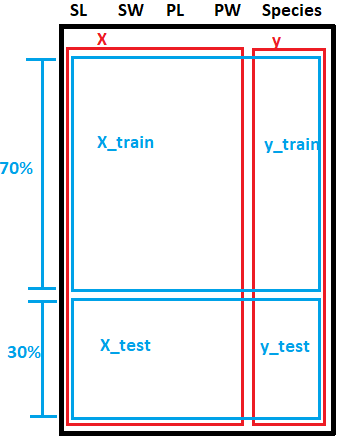

In [1]:
from PIL import Image
Image.open("E:/code/6.MachineLearning/1_KNN_algorithm/knn6.PNG")

In [2]:
# import os
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

### step1 : import data

In [5]:
import os

os.chdir("E:/code/6.MachineLearning/1_KNN_algorithm")
print(os.getcwd())

E:\code\6.MachineLearning\1_KNN_algorithm


In [6]:
import pandas as pd

df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Step2: Preprocessing
- Hence it is balanced dataset no need of preprocessing

### Step3: Identify the Independent X and dependent y variables

In [8]:
# create a DF X with required input columns and converting DF to 2d numpy array
X = df.iloc[:,:-1].values             # DF: pandas.core.frame.DataFrame
X[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [9]:
# create a Series y with required target column 
y = df.iloc[:,-1]            # series: pandas.core.series.Series     # np.unique(y, return_inverse=True)[1]                     

In [10]:
y.unique()                  # return unique values of Series object

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [11]:
# converting string values into numeric values
y.replace(['setosa', 'versicolor', 'virginica'],[0,1,2], inplace=True)

In [12]:
#convert the Series to 1d array
y = y.values

In [13]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

### Step4: Split the data into train and test(more % for train, min % for test)
- Here 70% for training and 30% for testing
- out of 150 samples 
- 105(35,35,35) samples for training and 45(15,15,15) samples for testing

#### train_test_split?
- *arrays : sequence of indexables with same length / shape[0] Allowed inputs are lists, numpy arrays, scipy-sparse matrices or pandas dataframes.
- test_size : float or int, default=None
- train_size : float or int, default=None
- random_state : int or RandomState instance, default=None
    - Controls the shuffling applied to the data before applying the split. Pass an int for reproducible output across multiple function calls.
    - values available from 2**32-1
- shuffle : bool, default=True
    Whether or not to shuffle the data before splitting. If shuffle=False
    then stratify must be None.

- stratify : array-like, default=None
    If not None, data is split in a stratified fashion, using this as
    the class labels.    

In [14]:
from sklearn.model_selection import train_test_split

seed = 42                                                        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed,shuffle=True, stratify=y)

#### understand about stratify
- Must Read:https://en.wikipedia.org/wiki/Stratified_sampling

- understand about random_state?
- What is Balanced Data ?

In [15]:
import numpy as np

# Count of each class in orginal data
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{0: 50, 1: 50, 2: 50}

In [16]:
# Count of each class in train sample data
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0: 35, 1: 35, 2: 35}

In [17]:
# Count of each class in test sample data
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{0: 15, 1: 15, 2: 15}

### Step5: Fit \ Train the model using Training data

#### KNeighborsClassifier?
- KNeighborsClassifier(n_neighbors=5, *, 
                       weights='uniform', 
                       algorithm='auto', 
                       leaf_size=30,
                       p=2, 
                       metric='minkowski', 
                       metric_params=None,
                       n_jobs=None, **kwargs)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
                                                                # type(KNeighborsClassifier) = abc.ABCMeta
knn_model = KNeighborsClassifier(n_neighbors=8)                 # initialization or creating an object
knn_model.fit(X_train,y_train)                                  # observe how these 105 rows are alligned

KNeighborsClassifier(n_neighbors=8)

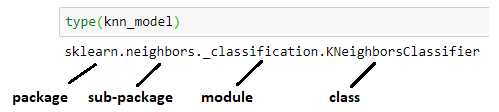

In [21]:
from PIL import Image
Image.open("E:/code/6.MachineLearning/1_KNN_algorithm/knn7.PNG")

In [22]:
#knn_model.kneighbors()

### Step6: predict labels on test data

In [23]:
y_test_pred = knn_model.predict(X_test)
y_test_pred              # machine predicted values

array([2, 1, 1, 1, 2, 2, 1, 1, 0, 2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 1, 0,
       1, 2, 1, 1, 1, 1, 1, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 1, 1, 0, 1, 2,
       1], dtype=int64)

In [24]:
y_test                 # truth values

array([2, 1, 2, 1, 2, 2, 1, 1, 0, 2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 1, 0,
       1, 2, 2, 1, 1, 1, 1, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 1, 1, 0, 2, 2,
       1], dtype=int64)

In [25]:
#knn_model.predict_proba(X_test)

In [26]:
np.bincount(y_test_pred)

array([15, 18, 12], dtype=int64)

### Step7: Metrics(Accuracy)

In [27]:
y_test == y_test_pred

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True])

In [28]:
sum(y_test == y_test_pred)

42

In [29]:
42/45*100

93.33333333333333

In [30]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_test_pred)                              # accuracy_score(y_true, y_pred)

0.9333333333333333

#### or

In [31]:
knn_model.score(X_test, y_test)

0.9333333333333333

In [32]:
# clients are not happy with our model accuracy so we need to do improvements for that

### Step8: Hyper parameter tunning

### Method1: own code

#### Case1: first parameter(n_neighbors)

In [33]:
for i in list(range(2,21)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    print(f"n_neighbors is:{i}, respective accuracy is: {accuracy_score(y_test, y_test_pred)}")

n_neighbors is:2, respective accuracy is: 0.9111111111111111
n_neighbors is:3, respective accuracy is: 0.9555555555555556
n_neighbors is:4, respective accuracy is: 0.9555555555555556
n_neighbors is:5, respective accuracy is: 0.9777777777777777
n_neighbors is:6, respective accuracy is: 0.9555555555555556
n_neighbors is:7, respective accuracy is: 0.9555555555555556
n_neighbors is:8, respective accuracy is: 0.9333333333333333
n_neighbors is:9, respective accuracy is: 0.9555555555555556
n_neighbors is:10, respective accuracy is: 0.9555555555555556
n_neighbors is:11, respective accuracy is: 0.9333333333333333
n_neighbors is:12, respective accuracy is: 0.9333333333333333
n_neighbors is:13, respective accuracy is: 0.9333333333333333
n_neighbors is:14, respective accuracy is: 0.9333333333333333
n_neighbors is:15, respective accuracy is: 0.9555555555555556
n_neighbors is:16, respective accuracy is: 0.9555555555555556
n_neighbors is:17, respective accuracy is: 0.9555555555555556
n_neighbors is:1

#### Case2 : another parameter weights = ['uniform','distance']

In [34]:
rs = []
for i in list(range(2,21)):
    for w in ['uniform', 'distance']:
        model = KNeighborsClassifier(n_neighbors=i, weights=w)
        model.fit(X_train, y_train)
        y_test_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_test_pred)
        rs.append((i,w,acc))
rs                                # length of results = 19*2 = 38

[(2, 'uniform', 0.9111111111111111),
 (2, 'distance', 0.9333333333333333),
 (3, 'uniform', 0.9555555555555556),
 (3, 'distance', 0.9555555555555556),
 (4, 'uniform', 0.9555555555555556),
 (4, 'distance', 0.9555555555555556),
 (5, 'uniform', 0.9777777777777777),
 (5, 'distance', 0.9777777777777777),
 (6, 'uniform', 0.9555555555555556),
 (6, 'distance', 0.9777777777777777),
 (7, 'uniform', 0.9555555555555556),
 (7, 'distance', 0.9555555555555556),
 (8, 'uniform', 0.9333333333333333),
 (8, 'distance', 0.9333333333333333),
 (9, 'uniform', 0.9555555555555556),
 (9, 'distance', 0.9555555555555556),
 (10, 'uniform', 0.9555555555555556),
 (10, 'distance', 0.9555555555555556),
 (11, 'uniform', 0.9333333333333333),
 (11, 'distance', 0.9555555555555556),
 (12, 'uniform', 0.9333333333333333),
 (12, 'distance', 0.9333333333333333),
 (13, 'uniform', 0.9333333333333333),
 (13, 'distance', 0.9333333333333333),
 (14, 'uniform', 0.9333333333333333),
 (14, 'distance', 0.9333333333333333),
 (15, 'uniform'

#### Case3: another parameter algorithm=['ball_tree', 'kd_tree', 'brute']

##### for more: https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbor-algorithms

In [35]:
rs = []
for i in list(range(2,21)):
    for w in ['uniform', 'distance']:
        for alg in ['ball_tree', 'kd_tree', 'brute']:
            model = KNeighborsClassifier(n_neighbors=i, weights=w, algorithm=alg)
            model.fit(X_train, y_train)
            y_test_pred = model.predict(X_test)
            acc = accuracy_score(y_test, y_test_pred)
            rs.append((i,w,acc))
rs                                # length of results = 19*2 = 38*3 = 144

[(2, 'uniform', 0.9111111111111111),
 (2, 'uniform', 0.9111111111111111),
 (2, 'uniform', 0.9111111111111111),
 (2, 'distance', 0.9333333333333333),
 (2, 'distance', 0.9333333333333333),
 (2, 'distance', 0.9333333333333333),
 (3, 'uniform', 0.9555555555555556),
 (3, 'uniform', 0.9555555555555556),
 (3, 'uniform', 0.9555555555555556),
 (3, 'distance', 0.9555555555555556),
 (3, 'distance', 0.9555555555555556),
 (3, 'distance', 0.9555555555555556),
 (4, 'uniform', 0.9555555555555556),
 (4, 'uniform', 0.9555555555555556),
 (4, 'uniform', 0.9333333333333333),
 (4, 'distance', 0.9555555555555556),
 (4, 'distance', 0.9555555555555556),
 (4, 'distance', 0.9333333333333333),
 (5, 'uniform', 0.9777777777777777),
 (5, 'uniform', 0.9777777777777777),
 (5, 'uniform', 0.9777777777777777),
 (5, 'distance', 0.9777777777777777),
 (5, 'distance', 0.9777777777777777),
 (5, 'distance', 0.9777777777777777),
 (6, 'uniform', 0.9555555555555556),
 (6, 'uniform', 0.9555555555555556),
 (6, 'uniform', 0.95555555

#### CV: https://www.youtube.com/watch?v=7062skdX05Y&ab_channel=KrishNaik
- https://scikit-learn.org/stable/modules/cross_validation.html

##### method2: GridSearchCV

#### GridSearchCV?
- GridSearchCV(estimator,
             param_grid, *, 
             scoring=None,
             n_jobs=None,
             iid='deprecated', 
             refit=True,
             cv=None(by default cv=3 ), 
             verbose=0,
             pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)

In [36]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

knn_model = KNeighborsClassifier(n_neighbors=8)

param_grid = {"n_neighbors":list(range(2,21)),
              "weights":['uniform','distance'],
              "algorithm":['ball_tree','kd_tree','brute']}

In [37]:
clf = GridSearchCV(knn_model, param_grid, cv=3)
clf                                                #type(clf) = sklearn.model_selection._search.GridSearchCV

GridSearchCV(cv=3, estimator=KNeighborsClassifier(n_neighbors=8),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20],
                         'weights': ['uniform', 'distance']})

In [38]:
#clf.fit?

In [39]:
clf.fit(X,y)               # here we are using 100 records for training and 50 records for testing 

GridSearchCV(cv=3, estimator=KNeighborsClassifier(n_neighbors=8),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20],
                         'weights': ['uniform', 'distance']})

#### clf.cv_results_?
- cv_results_ : dict of numpy (masked) ndarrays
    A dict with keys as column headers and values as columns, that can be
    imported into a pandas ``DataFrame``.

In [40]:
clf.cv_results_

{'mean_fit_time': array([0.0013334 , 0.00099977, 0.00132887, 0.00100644, 0.00099309,
        0.00066646, 0.0006725 , 0.00099913, 0.00033339, 0.00066662,
        0.00066646, 0.00066654, 0.00133395, 0.00099929, 0.00099969,
        0.0013303 , 0.00099881, 0.00066598, 0.00099945, 0.00066614,
        0.00099953, 0.00099889, 0.00100025, 0.00067337, 0.00099937,
        0.00099953, 0.00099301, 0.00066582, 0.00099969, 0.00099921,
        0.00033307, 0.00066654, 0.00166702, 0.00233245, 0.00699631,
        0.00200113, 0.00233189, 0.00233301, 0.00233221, 0.00233237,
        0.00166655, 0.00133276, 0.001333  , 0.00099905, 0.00133268,
        0.00133244, 0.00199858, 0.00199938, 0.00266496, 0.00199906,
        0.00099985, 0.00166726, 0.00199946, 0.00133236, 0.00266544,
        0.00333039, 0.00299803, 0.00099985, 0.00166519, 0.00133204,
        0.00099913, 0.00099985, 0.001333  , 0.00166519, 0.00099889,
        0.00033323, 0.00099993, 0.00099881, 0.00099937, 0.00099921,
        0.00033315, 0.00066614,

In [41]:
clf.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=4)

In [42]:
clf.best_score_

0.9866666666666667

In [43]:
clf.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 4, 'weights': 'uniform'}

In [44]:
clf.best_index_

4

In [45]:
clf.n_splits_

3

### method3: RandomSearchCV

In [46]:
from sklearn.model_selection import RandomizedSearchCV

knn_rand_model = RandomizedSearchCV(knn_model, param_grid, random_state=seed, cv=5)

In [47]:
knn_rand_model.fit(X,y)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=8),
                   param_distributions={'algorithm': ['ball_tree', 'kd_tree',
                                                      'brute'],
                                        'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9,
                                                        10, 11, 12, 13, 14, 15,
                                                        16, 17, 18, 19, 20],
                                        'weights': ['uniform', 'distance']},
                   random_state=42)

In [48]:
knn_rand_model.best_params_

{'weights': 'uniform', 'n_neighbors': 7, 'algorithm': 'ball_tree'}

In [49]:
knn_rand_model.best_score_

0.9800000000000001

#### final accuracy score

In [50]:
knn_final_model = KNeighborsClassifier(n_neighbors=7, weights='uniform', algorithm='ball_tree', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)

In [51]:
knn_final_model.fit(X_train, y_train)         # here we are using 105 records for training and 45 records for testing 

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7)

In [52]:
y_test_pred = knn_final_model.predict(X_test)
y_test_pred

array([2, 1, 2, 1, 2, 2, 1, 1, 0, 2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 1, 0,
       1, 2, 1, 1, 1, 1, 1, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 1, 1, 0, 1, 2,
       1], dtype=int64)

In [53]:
y_test

array([2, 1, 2, 1, 2, 2, 1, 1, 0, 2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 1, 0,
       1, 2, 2, 1, 1, 1, 1, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 1, 1, 0, 2, 2,
       1], dtype=int64)

In [54]:
accuracy_score(y_test_pred, y_test)

0.9555555555555556

### Step9: save the model

In [55]:
import pickle

filename='knn_best_model.pkl'
pickle.dump(knn_final_model, open(filename, 'wb'))

### Step10: load the model

In [56]:
import os

os.getcwd()

'E:\\code\\6.MachineLearning\\1_KNN_algorithm'

In [57]:
import pickle

filename='knn_best_model.pkl'
loaded_model = pickle.load(open(filename, 'rb'))

In [58]:
a = loaded_model.predict([[5.0,3.4,1.5,0.2]])
a

array([0], dtype=int64)

In [59]:
np.unique(y, return_inverse=True)

(array([0, 1, 2], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64))

In [60]:
import numpy as np

array1 = np.array([0,1,2])
b = np.where(a==["0","1","2"],["setosa","virginica","versicolor"],array1)
b

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.


array(['0', '1', '2'], dtype='<U11')

#### for More: https://scikit-learn.org/stable/modules/neighbors.html
#### for more: https://www.kaggle.com/dkim1992/grid-search-vs-random-search